<a href="https://colab.research.google.com/github/Zohrae/TPDM/blob/main/TP07_DM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Text Mining \& Natural Language Processing**

In [ ]:
import re
from collections import Counter


# Corpus
documents = [
    "Son nom est celebre par le bocage qui fremit et par le ruisseau qui murmure les vents l'emportent jusqu'a l'arc celeste l'arc de grace et de consolation que sa main tendit dans les nuages",
    "A peine distinguait-on deux buts a l'extremite de la carriere des chenes ombrageaient l'un autour de l'autre des palmiers se dessinaient dans l'eclat du soir",
    "Ah le beau temps de mes travaux poetiques les beaux jours que j'ai passes pres de toi Les premiers inepuisables de joie de paix et de liberte les derniers empreints d'une melancolie qui eut bien aussi ses charmes"
]

def preprocess(text):
    """Preprocessing: lowercase, suppression ponctuation, tokenisation"""
    text = text.lower()
    text = re.sub(r'[^\w\s]', ' ', text)
    tokens = text.split()
    # Filtrage des stopwords simples
    stopwords = {'le', 'la', 'les', 'de', 'et', 'un', 'une', 'des', 'que', 'qui', 'dans', 'par', 'a', 'du'}
    tokens = [t for t in tokens if t not in stopwords and len(t) > 2]
    return tokens

# Tokenisation
tokenized_docs = [preprocess(doc) for doc in documents]
print("Documents tokenises:")
for i, tokens in enumerate(tokenized_docs):
    print(f"Doc {i+1}: {tokens[:10]}... (total: {len(tokens)} mots)")

Documents tokenises:
Doc 1: ['son', 'nom', 'est', 'celebre', 'bocage', 'fremit', 'ruisseau', 'murmure', 'vents', 'emportent']... (total: 19 mots)
Doc 2: ['peine', 'distinguait', 'deux', 'buts', 'extremite', 'carriere', 'chenes', 'ombrageaient', 'autour', 'autre']... (total: 14 mots)
Doc 3: ['beau', 'temps', 'mes', 'travaux', 'poetiques', 'beaux', 'jours', 'passes', 'pres', 'toi']... (total: 23 mots)


In [ ]:
import math

def compute_idf(tokenized_docs):
    """Calcule l'IDF pour tous les termes du corpus"""
    # Vocabulaire complet
    vocab = set()
    for tokens in tokenized_docs:
        vocab.update(tokens)

    # Nombre de documents contenant chaque terme
    N = len(tokenized_docs)
    idf_dict = {}

    for term in vocab:
        doc_count = sum(1 for tokens in tokenized_docs if term in tokens)
        # Formule IDF classique
        idf_dict[term] = math.log(N / doc_count)
        # Formule IDF lissee (sklearn)
        # idf_dict[term] = math.log((1 + N) / (1 + doc_count)) + 1

    return idf_dict

# Calcul IDF
idf_dict = compute_idf(tokenized_docs)

print("\n=== Inverse Document Frequency ===")
print(f"Nombre total de termes uniques: {len(idf_dict)}")
print("\nTermes specifiques (IDF eleve):")
for term, idf in sorted(idf_dict.items(), key=lambda x: x[1], reverse=True)[:10]:
    print(f"{term:15s}: IDF = {idf:.4f}")


=== Inverse Document Frequency ===
Nombre total de termes uniques: 55

Termes specifiques (IDF eleve):
derniers       : IDF = 1.0986
emportent      : IDF = 1.0986
eut            : IDF = 1.0986
autour         : IDF = 1.0986
chenes         : IDF = 1.0986
poetiques      : IDF = 1.0986
fremit         : IDF = 1.0986
soir           : IDF = 1.0986
dessinaient    : IDF = 1.0986
ruisseau       : IDF = 1.0986


In [ ]:
from collections import Counter

def compute_tf(tokenized_docs):
    """Calcule la frequence des termes (TF) pour tous les documents"""
    tf_docs = []
    for tokens in tokenized_docs:
        tf = Counter(tokens)
        tf_docs.append(tf)
    return tf_docs

def compute_tfidf(tf_docs, idf_dict):
    """Calcule TF-IDF pour tous les documents"""
    tfidf_docs = []

    for tf_doc in tf_docs:
        tfidf = {}
        for term, tf_value in tf_doc.items():
            tfidf[term] = tf_value * idf_dict[term]
        tfidf_docs.append(tfidf)

    return tfidf_docs

# Calcul TF
tf_docs = compute_tf(tokenized_docs)

# Calcul TF-IDF
tfidf_docs = compute_tfidf(tf_docs, idf_dict)

# Affichage des mots-cles pour chaque document
print("\n=== EXTRACTION DES MOTS-CLES (TF-IDF) ===\n")
for i, tfidf in enumerate(tfidf_docs):
    print(f"Document {i+1} - Top 10 mots-cles:")
    for term, score in sorted(tfidf.items(), key=lambda x: x[1], reverse=True)[:10]:
        print(f"  {term:15s}: {score:.4f}")
    print()


=== EXTRACTION DES MOTS-CLES (TF-IDF) ===

Document 1 - Top 10 mots-cles:
  arc            : 2.1972
  son            : 1.0986
  nom            : 1.0986
  est            : 1.0986
  celebre        : 1.0986
  bocage         : 1.0986
  fremit         : 1.0986
  ruisseau       : 1.0986
  murmure        : 1.0986
  vents          : 1.0986

Document 2 - Top 10 mots-cles:
  peine          : 1.0986
  distinguait    : 1.0986
  deux           : 1.0986
  buts           : 1.0986
  extremite      : 1.0986
  carriere       : 1.0986
  chenes         : 1.0986
  ombrageaient   : 1.0986
  autour         : 1.0986
  autre          : 1.0986

Document 3 - Top 10 mots-cles:
  beau           : 1.0986
  temps          : 1.0986
  mes            : 1.0986
  travaux        : 1.0986
  poetiques      : 1.0986
  beaux          : 1.0986
  jours          : 1.0986
  passes         : 1.0986
  pres           : 1.0986
  toi            : 1.0986



In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
# Vectorisation TF-IDF avec sklearn
vectorizer = TfidfVectorizer(
    lowercase=True,
    token_pattern=r'\b\w{3,}\b',  # Mots de 3+ lettres
    stop_words=None  # Gestion manuelle des stopwords
)

tfidf_matrix = vectorizer.fit_transform(documents)
feature_names = vectorizer.get_feature_names_out()

print("=== VERIFICATION SKLEARN ===")
print(f"Shape de la matrice TF-IDF: {tfidf_matrix.shape}")
print(f"(documents × vocabulaire)")

# Affichage matrice dense
df_tfidf = pd.DataFrame(
    tfidf_matrix.toarray(),
    columns=feature_names,
    index=['Doc1', 'Doc2', 'Doc3']
)

print("\nTop 5 termes par document:")
for idx in df_tfidf.index:
    top_terms = df_tfidf.loc[idx].nlargest(5)
    print(f"\n{idx}:")
    for term, score in top_terms.items():
        print(f"  {term}: {score:.4f}")

=== VERIFICATION SKLEARN ===
Shape de la matrice TF-IDF: (3, 62)
(documents × vocabulaire)

Top 5 termes par document:

Doc1:
  arc: 0.3605
  par: 0.3605
  les: 0.2741
  qui: 0.2741
  bocage: 0.1802

Doc2:
  des: 0.4640
  autour: 0.2320
  autre: 0.2320
  buts: 0.2320
  carriere: 0.2320

Doc3:
  les: 0.4141
  aussi: 0.1815
  beau: 0.1815
  beaux: 0.1815
  bien: 0.1815


In [ ]:
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Exemple de texte
sentence = "le chat mange le poisson"
words = sentence.split()

# Création du vocabulaire
vocab = sorted(set(words))
word_to_idx = {word: idx for idx, word in enumerate(vocab)}

print(f"Vocabulaire: {vocab}")
print(f"Taille du vocabulaire: {len(vocab)}")

# One-Hot encoding manuel
def one_hot_manual(word, vocab_size, word_to_idx):
    vector = np.zeros(vocab_size)
    vector[word_to_idx[word]] = 1
    return vector

# Encodage de chaque mot
print("\n=== ONE-HOT ENCODING ===")
for word in words:
    vec = one_hot_manual(word, len(vocab), word_to_idx)
    print(f"{word:10s}: {vec}")

# Avec sklearn
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(words)
onehot_encoder = OneHotEncoder(sparse_output=False) # Changed sparse=False to sparse_output=False
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)

print("\n=== SKLEARN ONE-HOT ===")
print(f"Shape: {onehot_encoded.shape}")
print(onehot_encoded)

Vocabulaire: ['chat', 'le', 'mange', 'poisson']
Taille du vocabulaire: 4

=== ONE-HOT ENCODING ===
le        : [0. 1. 0. 0.]
chat      : [1. 0. 0. 0.]
mange     : [0. 0. 1. 0.]
le        : [0. 1. 0. 0.]
poisson   : [0. 0. 0. 1.]

=== SKLEARN ONE-HOT ===
Shape: (5, 4)
[[0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]]


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Corpus exemple
corpus = [
    "Le chat mange la souris",
    "Le chien chasse le chat",
    "La souris mange le fromage"
]

# CountVectorizer
count_vectorizer = CountVectorizer(
    lowercase=True,
    token_pattern=r'\b\w+\b'
)

bow_matrix = count_vectorizer.fit_transform(corpus)
vocab = count_vectorizer.get_feature_names_out()

print("=== BAG OF WORDS ===")
print(f"Vocabulaire: {list(vocab)}")
print(f"\nMatrice BoW (sparse):")
print(bow_matrix.toarray())

# Conversion en DataFrame
df_bow = pd.DataFrame(
    bow_matrix.toarray(),
    columns=vocab,
    index=[f'Doc{i+1}' for i in range(len(corpus))]
)
print("\n=== MATRICE BoW (DataFrame) ===")
print(df_bow)

# Similarite cosinus entre documents
from sklearn.metrics.pairwise import cosine_similarity
similarities = cosine_similarity(bow_matrix)
print("\n=== SIMILARITE COSINUS ===")
print(similarities)

=== BAG OF WORDS ===
Vocabulaire: ['chasse', 'chat', 'chien', 'fromage', 'la', 'le', 'mange', 'souris']

Matrice BoW (sparse):
[[0 1 0 0 1 1 1 1]
 [1 1 1 0 0 2 0 0]
 [0 0 0 1 1 1 1 1]]

=== MATRICE BoW (DataFrame) ===
      chasse  chat  chien  fromage  la  le  mange  souris
Doc1       0     1      0        0   1   1      1       1
Doc2       1     1      1        0   0   2      0       0
Doc3       0     0      0        1   1   1      1       1

=== SIMILARITE COSINUS ===
[[1.         0.50709255 0.8       ]
 [0.50709255 1.         0.3380617 ]
 [0.8        0.3380617  1.        ]]


In [ ]:
!pip install gensim

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 45.2 MB/s eta 0:00:00


In [ ]:
from gensim.models import Word2Vec
import numpy as np

# Corpus d'entrainement (tokenise)
sentences = [
    ['le', 'chat', 'mange', 'la', 'souris'],
    ['le', 'chien', 'chasse', 'le', 'chat'],
    ['la', 'souris', 'mange', 'le', 'fromage'],
    ['le', 'chat', 'dort', 'sur', 'le', 'canape'],
    ['le', 'chien', 'aboie', 'fort']
]

# Entrainement Word2Vec
model_w2v = Word2Vec(
    sentences=sentences,
    vector_size=50,      # Dimension des vecteurs
    window=3,            # Taille contexte
    min_count=1,         # Frequence minimale
    sg=1,                # Skip-gram (0 pour CBOW)
    epochs=100
)

# Acces aux vecteurs
print("=== WORD2VEC EMBEDDINGS ===")
print(f"Vocabulaire: {list(model_w2v.wv.key_to_index.keys())}")
print(f"\nVecteur 'chat': {model_w2v.wv['chat'][:10]}... (50D)")

# Similarites semantiques
print("\n=== SIMILARITES SEMANTIQUES ===")
similar_words = model_w2v.wv.most_similar('chat', topn=3)
for word, sim in similar_words:
    print(f"'{word}': {sim:.4f}")

# Analogies vectorielles: roi - homme + femme ≈ reine
# Exemple simple: chat - animal + humain ≈ ?


=== WORD2VEC EMBEDDINGS ===
Vocabulaire: ['le', 'chat', 'chien', 'souris', 'la', 'mange', 'fort', 'aboie', 'canape', 'sur', 'dort', 'fromage', 'chasse']

Vecteur 'chat': [-0.01637818  0.00889519 -0.00844709  0.00161286  0.01693528 -0.00893521
  0.00926994 -0.01354149 -0.00738089  0.01888592]... (50D)

=== SIMILARITES SEMANTIQUES ===
'la': 0.1297
'chasse': 0.0852
'fort': 0.0777


In [ ]:
from transformers import CamembertModel, CamembertTokenizer
import torch

# Modele francais
tokenizer = CamembertTokenizer.from_pretrained('camembert-base')
model = CamembertModel.from_pretrained('camembert-base')

# Texte exemple
text = "Le chat mange la souris."
inputs = tokenizer(text, return_tensors='pt')

# Generation des embeddings
with torch.no_grad():
    outputs = model(**inputs)
    embeddings = outputs.last_hidden_state

print("=== CAMEMBERT EMBEDDINGS ===")
print(f"Shape: {embeddings.shape}")  # (batch, sequence_length, hidden_size)
print(f"Dimension: {embeddings.shape[-1]}D")  # 768D pour base

# Embedding moyen du texte (sentence embedding)
sentence_embedding = embeddings.mean(dim=1)
print(f"Sentence embedding shape: {sentence_embedding.shape}")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/811k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.40M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/508 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/445M [00:00<?, ?B/s]

=== CAMEMBERT EMBEDDINGS ===
Shape: torch.Size([1, 8, 768])
Dimension: 768D
Sentence embedding shape: torch.Size([1, 768])


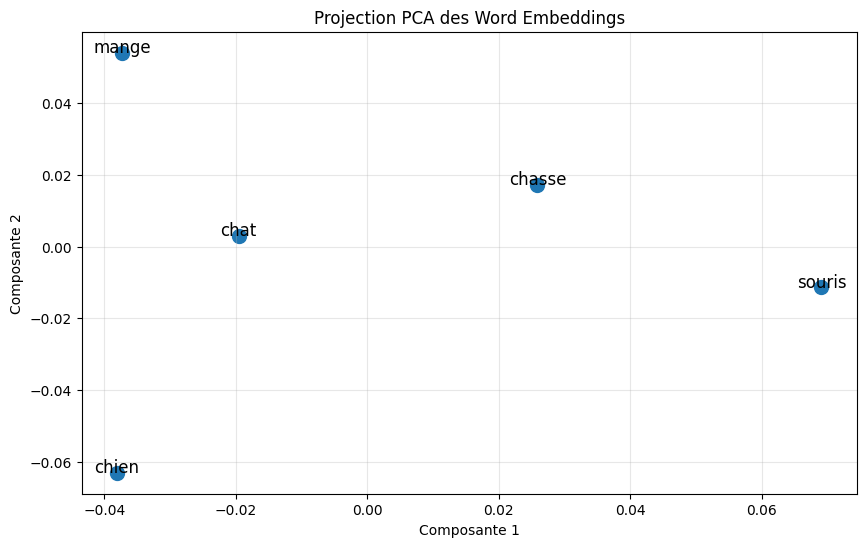

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Extraction des vecteurs Word2Vec
words = ['chat', 'chien', 'souris', 'mange', 'chasse']
vectors = np.array([model_w2v.wv[word] for word in words])

# Reduction de dimension: 50D -> 2D
pca = PCA(n_components=2)
vectors_2d = pca.fit_transform(vectors)

# Visualisation
plt.figure(figsize=(10, 6))
plt.scatter(vectors_2d[:, 0], vectors_2d[:, 1], s=100)
for i, word in enumerate(words):
    plt.annotate(word, (vectors_2d[i, 0], vectors_2d[i, 1]),
                fontsize=12, ha='center')
plt.title("Projection PCA des Word Embeddings")
plt.xlabel("Composante 1")
plt.ylabel("Composante 2")
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Dataset d'exemple (avis de films)
reviews = [
    "Ce film est excellent j'ai adore les acteurs",
    "Magnifique scenario emotion garantie",
    "Film horrible ennuyeux a mourir",
    "Decevant mauvais scenario acteurs mediocres",
    "Incroyable chef d'oeuvre cinematographique",
    "Nul je me suis endormi",
    "Tres bon film je recommande vivement",
    "Perte de temps horrible experience",
]

sentiments = [1, 1, 0, 0, 1, 0, 1, 0]  # 1=positif, 0=negatif

# Vectorisation TF-IDF
vectorizer = TfidfVectorizer(max_features=100)
X = vectorizer.fit_transform(reviews)
y = np.array(sentiments)

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

# Modele SVM
svm_model = LinearSVC(random_state=42)
svm_model.fit(X_train, y_train)

# Predictions
y_pred = svm_model.predict(X_test)

print("=== ANALYSE DE SENTIMENTS ===")
print("\nRapport de classification:")
print(classification_report(y_test, y_pred,
      target_names=['Negatif', 'Positif']))

# Test sur nouveaux textes
new_reviews = [
    "Film fantastique avec des effets speciaux incroyables",
    "Scenario faible et previsible"
]
new_X = vectorizer.transform(new_reviews)
predictions = svm_model.predict(new_X)

print("\n=== PREDICTIONS ===")
for review, pred in zip(new_reviews, predictions):
    sentiment = "POSITIF" if pred == 1 else "NEGATIF"
    print(f"{review[:50]}... => {sentiment}")

=== ANALYSE DE SENTIMENTS ===

Rapport de classification:
              precision    recall  f1-score   support

     Negatif       0.00      0.00      0.00       1.0
     Positif       0.00      0.00      0.00       1.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0


=== PREDICTIONS ===
Film fantastique avec des effets speciaux incroyab... => POSITIF
Scenario faible et previsible... => NEGATIF


In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

# Dataset d'exemple
emails = [
    "Bonjour, voici le rapport mensuel",
    "URGENT: Vous avez gagne 1000000 euros cliquez ici",
    "Reunion demain a 14h salle 302",
    "VIAGRA pas cher achetez maintenant",
    "Peux-tu relire mon document stp",
    "Felicitations vous etes selectionne cliquez",
    "Compte-rendu de la reunion d'hier",
    "GRATUIT argent facile sans effort"
]

labels = [0, 1, 0, 1, 0, 1, 0, 1]  # 0=ham, 1=spam

# Pipeline: TF-IDF + Naive Bayes
spam_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(
        max_features=500,
        ngram_range=(1, 2),
        stop_words=None
    )),
    ('clf', MultinomialNB(alpha=0.1))
])

# Entrainement
spam_pipeline.fit(emails, labels)

# Cross-validation
cv_scores = cross_val_score(
    spam_pipeline, emails, labels, cv=3, scoring='f1'
)
print("=== SPAM DETECTION ===")
print(f"F1-Score moyen (CV): {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

# Test
test_emails = [
    "Peux-tu m'envoyer le fichier",
    "GAGNEZ DE L ARGENT FACILEMENT"
]
predictions = spam_pipeline.predict(test_emails)

print("\n=== PREDICTIONS ===")
for email, pred in zip(test_emails, predictions):
    label = "SPAM" if pred == 1 else "HAM"
    print(f"{email[:50]}... => {label}")

# Mots les plus indicatifs
vectorizer = spam_pipeline.named_steps['tfidf']
clf = spam_pipeline.named_steps['clf']
feature_names = vectorizer.get_feature_names_out()

# Top features pour spam (classe 1)
spam_features_idx = np.argsort(clf.feature_log_prob_[1])[-10:]
print("\n=== MOTS CARACTERISTIQUES DU SPAM ===")
for idx in spam_features_idx:
    print(f"  {feature_names[idx]}")

=== SPAM DETECTION ===
F1-Score moyen (CV): 0.4444 ± 0.3143

=== PREDICTIONS ===
Peux-tu m'envoyer le fichier... => HAM
GAGNEZ DE L ARGENT FACILEMENT... => SPAM

=== MOTS CARACTERISTIQUES DU SPAM ===
  gratuit
  etes selectionne
  felicitations
  selectionne
  felicitations vous
  etes
  selectionne cliquez
  vous etes
  cliquez
  vous


In [ ]:
import pandas as pd
import numpy as np
import re
from collections import Counter, defaultdict

# Dataset d'exemple (SMS Spam Collection style)
data = {
    'label': ['spam', 'ham', 'spam', 'ham', 'spam', 'ham', 'spam', 'ham',
              'spam', 'ham', 'spam', 'ham', 'spam', 'ham', 'spam', 'ham'],
    'message': [
        "URGENT! You have won a 1000 prize GUARANTEED. Call now!",
        "Hi, how are you? Can we meet tomorrow for lunch?",
        "FREE entry in 2 a weekly competition. Text WIN to 87121",
        "I'll be home late today. Don't wait for dinner.",
        "WINNER!! As a valued customer you have been selected to receive 500 CASH",
        "Thanks for your message. I'll call you back soon.",
        "Congratulations! You've won a FREE vacation. Click here NOW",
        "Could you send me the meeting notes from yesterday?",
        "Get VIAGRA for CHEAP! 50% discount. Order now!!!",
        "Let's go to the cinema this weekend. What do you think?",
        "URGENT ACTION REQUIRED: Verify your bank account immediately",
        "Happy birthday! Hope you have a wonderful day!",
        "Make MONEY fast! Work from home opportunity. Apply today",
        "The project deadline is next Friday. Please review the document.",
        "CLAIM your FREE prize NOW! Limited time offer!!!",
        "I enjoyed our conversation yesterday. See you soon!"
    ]
}

df = pd.DataFrame(data)

print("=== DATASET SPAM/HAM ===")
print(f"Total messages: {len(df)}")
print(f"Spam: {(df['label'] == 'spam').sum()}")
print(f"Ham: {(df['label'] == 'ham').sum()}")
print(f"\nExemples:")
print(df.head())

=== DATASET SPAM/HAM ===
Total messages: 16
Spam: 8
Ham: 8

Exemples:
  label                                            message
0  spam  URGENT! You have won a 1000 prize GUARANTEED. ...
1   ham   Hi, how are you? Can we meet tomorrow for lunch?
2  spam  FREE entry in 2 a weekly competition. Text WIN...
3   ham    I'll be home late today. Don't wait for dinner.
4  spam  WINNER!! As a valued customer you have been se...


In [ ]:
import nltk
from nltk.corpus import stopwords
import re # Import re for punctuation removal

# Telechargement des ressources NLTK (une seule fois)
nltk.download('stopwords', quiet=True)
nltk.download('punkt', quiet=True)

# Stopwords anglais
stop_words = set(stopwords.words('english'))

print("=== STOPWORDS ===")
print(f"Nombre de stopwords: {len(stop_words)}")
print(f"Exemples: {list(stop_words)[:20]}")

def preprocess_for_pmi(text, stop_words):
    """Preprocessing for PMI: lowercase, suppression ponctuation, tokenisation, suppression stopwords"""
    text = text.lower()
    text = re.sub(r'[^À-ſ-\'\w\s]', '', text) # Remove punctuation, keeping French accents and apostrophes
    tokens = text.split()
    # Filtrage des stopwords et mots courts
    filtered_tokens = [t for t in tokens if t not in stop_words and len(t) > 1]
    return filtered_tokens

# Application pour creer la colonne 'tokens'
df['tokens'] = df['message'].apply(
    lambda x: preprocess_for_pmi(x, stop_words)
)

print("\n=== AVANT/APRES PREPROCESSING (for PMI) ===")
for i in range(2):
    print(f"\nOriginal: {df['message'].iloc[i]}")
    print(f"Tokens:   {df['tokens'].iloc[i]}")

=== STOPWORDS ===
Nombre de stopwords: 198
Exemples: ['nor', 'such', 'who', "didn't", 'where', "weren't", 'once', "they'd", 'there', 'needn', 'being', 'only', 'at', 'me', 'off', 'o', "mustn't", 'because', 'we', "we've"]

=== AVANT/APRES PREPROCESSING (for PMI) ===

Original: URGENT! You have won a 1000 prize GUARANTEED. Call now!
Tokens:   ['urgent', '1000', 'prize', 'guaranteed', 'call']

Original: Hi, how are you? Can we meet tomorrow for lunch?
Tokens:   ['hi', 'meet', 'tomorrow', 'lunch']


In [ ]:
class PMICalculator:
    """Calcul du PMI pour classification de texte"""

    def __init__(self, alpha=1.0):
        """
        Args:
            alpha: parametre de lissage de Laplace
        """
        self.alpha = alpha
        self.vocab = set()
        self.class_word_counts = defaultdict(Counter)
        self.class_total_counts = defaultdict(int)
        self.word_counts = Counter()
        self.total_words = 0
        self.pmi_scores = {}

    def fit(self, documents, labels):
        """
        Calcule les statistiques necessaires pour le PMI

        Args:
            documents: liste de listes de tokens
            labels: liste des labels (classes)
        """
        # Comptage
        for doc, label in zip(documents, labels):
            for word in doc:
                self.vocab.add(word)
                self.class_word_counts[label][word] += 1
                self.class_total_counts[label] += 1
                self.word_counts[word] += 1
                self.total_words += 1

        # Calcul PMI pour chaque mot et chaque classe
        classes = list(self.class_total_counts.keys())

        for word in self.vocab:
            self.pmi_scores[word] = {}

            for cls in classes:
                # P(w|c) avec lissage de Laplace
                count_w_c = self.class_word_counts[cls][word]
                count_c = self.class_total_counts[cls]
                p_w_given_c = (count_w_c + self.alpha) / \
                              (count_c + self.alpha * len(self.vocab))

                # P(w)
                p_w = self.word_counts[word] / self.total_words

                # PMI(w, c)
                pmi = np.log2(p_w_given_c / p_w)
                self.pmi_scores[word][cls] = pmi

        return self

    def get_pmi(self, word, cls):
        """Retourne le PMI d'un mot pour une classe"""
        if word in self.pmi_scores:
            return self.pmi_scores[word].get(cls, 0.0)
        return 0.0

    def get_top_words(self, cls, n=10):
        """Retourne les top n mots pour une classe (PMI max)"""
        word_pmi_list = [(w, self.pmi_scores[w][cls])
                         for w in self.vocab]
        word_pmi_list.sort(key=lambda x: x[1], reverse=True)
        return word_pmi_list[:n]

    def display_statistics(self):
        """Affiche les statistiques du corpus"""
        print("=== STATISTIQUES DU CORPUS ===")
        print(f"Taille vocabulaire: {len(self.vocab)}")
        print(f"Total mots: {self.total_words}")
        print(f"\nPar classe:")
        for cls, count in self.class_total_counts.items():
            print(f"  {cls}: {count} mots")

# Entrainement du modele PMI
pmi_calc = PMICalculator(alpha=1.0)
pmi_calc.fit(df['tokens'].tolist(), df['label'].tolist())
pmi_calc.display_statistics()

print("\n" + "="*60)
print("=== PMI SCORES ===")
print("="*60)

# Affichage des PMI pour quelques mots
sample_words = ['urgent', 'prize', 'free', 'call', 'meeting', 'home']

print("\nPMI(word, spam) et PMI(word, ham):\n")
print(f"{'Mot':<15} {'PMI(w,spam)':<15} {'PMI(w,ham)':<15} {'Classe':<10}")
print("-" * 60)

for word in sample_words:
    if word in pmi_calc.vocab:
        pmi_spam = pmi_calc.get_pmi(word, 'spam')
        pmi_ham = pmi_calc.get_pmi(word, 'ham')
        predicted_class = 'spam' if pmi_spam > pmi_ham else 'ham'

        print(f"{word:<15} {pmi_spam:>14.4f} {pmi_ham:>14.4f}  {predicted_class:<10}")

=== STATISTIQUES DU CORPUS ===
Taille vocabulaire: 82
Total mots: 91

Par classe:
  spam: 50 mots
  ham: 41 mots

=== PMI SCORES ===

PMI(word, spam) et PMI(word, ham):

Mot             PMI(w,spam)     PMI(w,ham)      Classe    
------------------------------------------------------------
urgent                  0.0484        -1.4347  spam      
prize                   0.0484        -1.4347  spam      
free                   -0.1216        -2.0197  spam      
call                   -0.5366        -0.4347  ham       
meeting                -0.5366         0.5653  ham       
home                   -0.5366        -0.4347  ham       
